# Project One
## Supervised Learning
## Project: Analysis of ML algorithms on Breast Cancer Data

## Introduction

In this project, we will employ several supervised learning algorithms to accurately model breast cancer data collected from ‘scikit-learn’. We will then further optimize these algorithms to best model the data. The goal with this implementation is to construct a model that accurately predicts whether a tumor cell is malignant (cancerous) or benign(non-cancerous). Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all caner cases, and affected over 2.1 million people in 2015 alone. It starts when cells in the breast begin to grow out of control. This kind of task helps the medical industry to identity the malignant tumor cells and help save lives. 


The dataset for this project originates from the [scikitlearn repository]

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'target'`, will be our target label (whether the tumor cell is malignant or benign). All other columns are features about each tumor cell in the breast cancer dataset.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load breast cancer data 
### NOTE : even though i used the brest cancer data from scikit-learn, i downloaded it and stored it in the folder 

data = pd.read_csv("breast_cancer.csv")

# Display the first five records
display(data.head(n=5))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many tumor cells fit into either group, and will us about the percentage of these tumor cells that are malignant.In the code cell below, you will need to compute the following:

- The total number of records, `'n_records'`
- The number of tumor cells that are malignant , `'n_malignant'`.
- The number of tumor cells that are benign, `'n_benign'`.
- The percentage of tumor cells that are malignant, `'malignant_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'target'` entries are formatted. 

In [2]:
# Total number of records
n_records = data['mean radius'].count()

# Number of tumor cells that are malignant
n_malignant = np.sum(data['target'] == 1)

# Number of tumor cells that are benign
n_benign = np.sum(data['target'] == 0)

# Percentage of tumor cells that are malignant
malignant_percent = n_malignant / n_records * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of tumor cells that are malignant: {}".format(n_malignant))
print("Number of tumor cells that are benign: {}".format(n_benign))
print("Percentage of tumor cells that are malignant: {}%".format(malignant_percent))

Total number of records: 569
Number of tumor cells that are malignant: 357
Number of tumor cells that are benign: 212
Percentage of tumor cells that are malignant: 62.741652021089635%


### Features of the dataset

** Featureset Exploration **
Classes - 2
samples per class - 212(Malignant), 357(Benign)
Samples total - 569
Dimentionality(Features) - 30
Features - real, positive

In [3]:
data.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, moreover since there are so many features we don't have the medical domain knowledge to transform or work on the data, we just do the Shuffle and split and continue working on the applying the models.

In [2]:
# Split the data into features and target label
target = data['target']
features = data.drop('target', axis = 1)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [3]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


----
## Evaluating Model Performance
In this section, we will investigate five different supervised learning algorithms, and determine which is best at modeling the data. These five learning algorithms are - Decision Trees with some form of prunning, Support Vector Machines, Boosting (Ada-boost), K-Nearest Neighbors, and Neural Networks.

### Metrics 
We are particularly interested in predicting tumor cells that are malignant. It would seem that using accuracy as a metric for evaluating a particular model's performance would be appropriate. But in this case we want our model to precisely predict the tumor cells that are malignant. Therefore, we use F-beta score as a metric that considers both precision and recall.

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

## Model Implemenation : Decision Trees

In [18]:
# importing the necessary libraries
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Learning Curve for Decision Trees

### NOTE: 
This piece of code for drawing learning curves is taken from the site : 
https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5

Learning curves plot the training and validation loss of a sample of training examples by incrementally adding new training examples. Learning curves help us in identifying whether adding additional training examples would improve the validation score (score on unseen data). If a model is overfit, then adding additional training examples might improve the model performance on unseen data. Similarly, if a model is underfit, then adding training examples doesn’t help. ‘learning_curve’ method can be imported from Scikit-Learn’s ‘model_selection’ module as shown above.

Decision Tree model to the Census data and returns cross validation scores, train score and learning curve data.


In [7]:
#### NOTE : This piece of code for drawing learning curves is taken from the site : 
###https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5

#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    dtree = DecisionTreeClassifier(random_state=0)
    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',dtree]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=0,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=0)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

We’ll use the ‘learn_curve’ function to get a good fit model by setting the inverse regularization variable/parameter ‘c’ to 1 (i.e. we are not performing any regularization).

Cross Validation Accuracies:
-------------------------
[0.8859649122807017, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9469026548672567]

Mean Cross Validation Accuracy:
-------------------------
0.9262226362366093

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.021823386682793423

Training Accuracy:
---------------
1.0




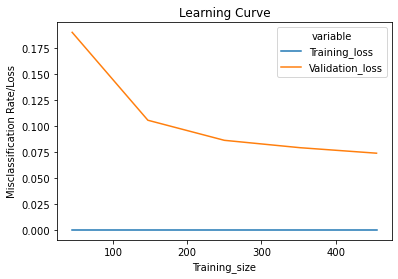

In [8]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

### Speed of Decision Trees on the training data set

In [9]:
%%time
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

CPU times: user 12.4 ms, sys: 1.42 ms, total: 13.9 ms
Wall time: 12.2 ms


DecisionTreeClassifier(random_state=0)

### Speed of Decison Trees on the testing data set

In [10]:
%%time
predictions = dtree.predict(X_test)

CPU times: user 2.05 ms, sys: 76 µs, total: 2.13 ms
Wall time: 2.08 ms


## Cross validation scores for training and testing data sets

In [11]:
# importing the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
DT_training_labels = dtree.predict(X_train) 
DT_test_labels = dtree.predict(X_test)

# printing the cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score before pruning:",accuracy_score(y_train, DT_training_labels))
print("Training precision score before pruning:",precision_score(y_train, DT_training_labels))
print("Training recall score before pruning:",recall_score(y_train, DT_training_labels))
print("Training F1-score before pruning:",f1_score(y_train, DT_training_labels))
print("Training Fbeta-score before pruning:",fbeta_score(y_train, DT_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score before pruning:",accuracy_score(y_test, DT_test_labels))
print("Testing precision score before pruning:",precision_score(y_test, DT_test_labels))
print("Testing recall score before pruning:",recall_score(y_test, DT_test_labels))
print("Testing F1-score before pruning:",f1_score(y_test, DT_test_labels))
print("Testing Fbeta-score before pruning:",fbeta_score(y_test, DT_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score before pruning: 1.0
Training precision score before pruning: 1.0
Training recall score before pruning: 1.0
Training F1-score before pruning: 1.0
Training Fbeta-score before pruning: 1.0


Cross validation scores for testing(validataion) labels
Testing accuracy score before pruning: 0.9122807017543859
Testing precision score before pruning: 0.9523809523809523
Testing recall score before pruning: 0.8955223880597015
Testing F1-score before pruning: 0.923076923076923
Testing Fbeta-score before pruning: 0.9404388714733543



##### confusion matrix plot 
True positive (TP) : 44
True negative (TN) : 60
False postive (FP - type 1 error ) : 3
False negative (FN - type 2 error ) : 7

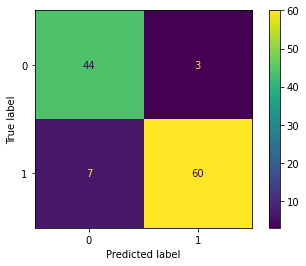

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
display.plot()
plt.show()

### ROC ( Area under the curve ) plot before pruning 

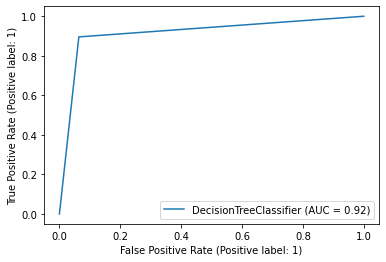

In [13]:
from sklearn.metrics import RocCurveDisplay
dtree_roc = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

## Implementation : Decision Trees with cost_complexity_prunning_path 

The DecisionTreeClassifier class in sklearn provides ccp_alpha as a parameter for post pruning. The parameter ccp_alpha provides a threshold for effective alphas, i.e. the process of pruning continues until the minimal effective alpha of the pruned tree is not greater than ccp_alpha. The DecisionTreeClassifier class also provides a method cost_complexity_pruning_path which implements the pruning process and returns the effective alphas(and the corresponding impurities of there pruned trees)


In [19]:
#pruning by cost complexity
dtree = DecisionTreeClassifier(random_state=0)
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Plotting the alphas vs impurities(except the last alpha corresponding to root node):

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

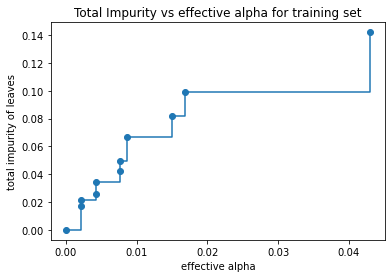

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

we build a forest of trees with different values of ccp_alpha values extracted from cost_complexity_pruning_path in order. The last tree will be the root node.

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [17]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666 and a depth of: 0


The last tree in the ‘list’ clfs has the highest ccp_alpha value, it has three nodes tree with a depth of one. We can remove this tree and continue.


In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

We plot how the different values of ccp_alpha influence the number of nodes and depth of the corresponding pruned trees.


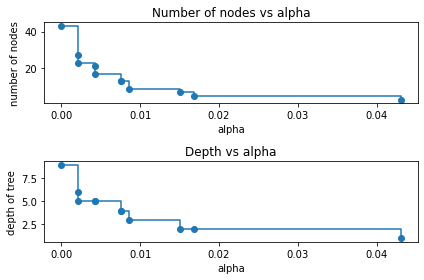

In [19]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The plot shows that with the zero value of effective alpha the tree generated has the highest number of nodes and is the deepest(grows to the maximum), while as the effective alpha increases the trees are more pruned and have relatively fewer nodes and less deeper.

We get the list of train and test mean accuracy scores for each of the (remaining) trees and check how train/test accuracy scores change w.r.t the change in ccp_alpha.

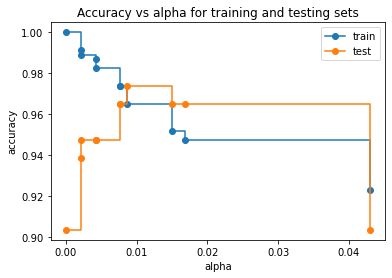

In [20]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Speed on training dataset after pruning

In [23]:
%%time
best_model.fit(X_train,y_train)

CPU times: user 13.1 ms, sys: 1.75 ms, total: 14.8 ms
Wall time: 12.9 ms


DecisionTreeClassifier(ccp_alpha=0.008658163913740103, random_state=1)

#### Speed on testing dataset after pruning

In [24]:
%%time
predictions = best_model.predict(X_test)

CPU times: user 2.11 ms, sys: 63 µs, total: 2.17 ms
Wall time: 2.13 ms


With the initial smaller values of alpha, there is a huge disparity between the training and test accuracy scores. 
When the alpha value increases, the training accuracy decreases, and the test accuracy increases until we reach the optimal point(highest test accuracy score). In the plot, the optimal point lies between 0 to 0.005 of alpha, where we get the optimal pruned tree. Beyond this point with an increase in alpha, the tree is over pruned. This eventually leads to under-fitting, both the training and test accuracy scores decrease.


In [25]:
# importing the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
DT_training_labels = best_model.predict(X_train) 
DT_test_labels = best_model.predict(X_test)

# printing cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score after pruning:",accuracy_score(y_train, DT_training_labels))
print("Training precision score after pruning:",precision_score(y_train, DT_training_labels))
print("Training recall score after pruning:",recall_score(y_train, DT_training_labels))
print("Training F1-score after pruning:",f1_score(y_train, DT_training_labels))
print("Training Fbeta-score after pruning:",fbeta_score(y_train, DT_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score after pruning:",accuracy_score(y_test, DT_test_labels))
print("Testing precision score after pruning:",precision_score(y_test, DT_test_labels))
print("Testing recall score after pruning:",recall_score(y_test, DT_test_labels))
print("Testing F1-score after pruning:",f1_score(y_test, DT_test_labels))
print("Testing Fbeta-score after pruning:",fbeta_score(y_test, DT_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score after pruning: 0.9648351648351648
Training precision score after pruning: 0.9628378378378378
Training recall score after pruning: 0.9827586206896551
Training F1-score after pruning: 0.9726962457337884
Training Fbeta-score after pruning: 0.9667571234735414


Cross validation scores for testing(validataion) labels
Testing accuracy score after pruning: 0.9736842105263158
Testing precision score after pruning: 0.9705882352941176
Testing recall score after pruning: 0.9850746268656716
Testing F1-score after pruning: 0.9777777777777777
Testing Fbeta-score after pruning: 0.9734513274336283



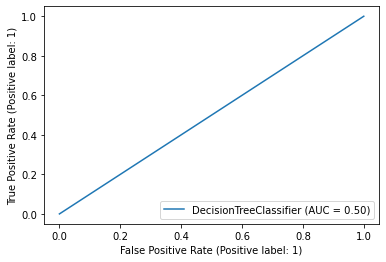

In [26]:
from sklearn.metrics import RocCurveDisplay
clf_roc = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

## Improving Results (Improving Decision Tree model performance)

In this section, we will perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 2 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

##### NOTE : Acknowledgment : https://ai.plainenglish.io/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

#### What is Grid Search?
Grid search is a technique for tuning hyperparameter that may facilitate build a model and evaluate a model for every combination of algorithms parameters per grid.
We might use 10 fold cross-validation to search the best value for that tuning hyperparameter. Parameters like in decision criterion, max_depth, min_sample_split, etc. These values are called hyperparameters. To get the simplest set of hyperparameters we will use the Grid Search method. In the Grid Search, all the mixtures of hyperparameters combinations will pass through one by one into the model and check the score on each model. It gives us the set of hyperparameters which gives the best score. Scikit-learn package as a means of automatically iterating over these hyperparameters using cross-validation. This method is called Grid Search.


#### How does it work?
Grid Search takes the model or objects you’d prefer to train and different values of the hyperparameters. It then calculates the error for various hyperparameter values, permitting you to choose the best values.

In [14]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

parameters = {"criterion":['gini','entropy'],
              "max_depth":range(1,20),
              "min_samples_split":range(1,10),
              "min_samples_leaf":range(1,5)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
#best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9123
F-score on testing data: 0.9404

Optimized Model
------
Final accuracy score on the testing data: 0.9386
Final F-score on the testing data: 0.9517


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
760 fits failed out of a total of 6840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater

### Finding the best Hyperparameters


In [15]:
grid_fit.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

## ROC( Area under the curve ) plot for optimized Decision Trees

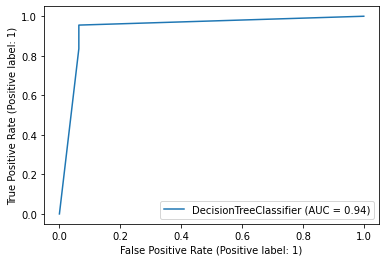

In [70]:
from sklearn.metrics import RocCurveDisplay
best_clf_roc = RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

### Final Decision Tree Model Evaluation ( Unoptimized vs Optimized )

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.9123           |  0.9386         |
| F-score        |  0.9404           |  0.9517         |

**Answer: ** 

The result shows that the optimized model performs much better after the hyperparameter tunning. 

# Model Implemenation : Support Vector Machines (SVMs)

In [24]:
from sklearn.svm import SVC
svm_model = SVC(random_state=0)

In [25]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    svm = svm_model
   # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',svm]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

Cross Validation Accuracies:
-------------------------
[0.9649122807017544, 0.9649122807017544, 0.956140350877193, 1.0, 0.9911504424778761]

Mean Cross Validation Accuracy:
-------------------------
0.9754230709517155

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.016995013229745056

Training Accuracy:
---------------
0.9876977152899824




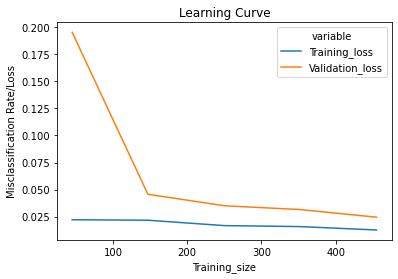

In [26]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

### Speed of SVMs on the training data set

In [71]:
%%time
svm = SVC(random_state=0)
svm.fit(X_train,y_train)

CPU times: user 7.94 ms, sys: 967 µs, total: 8.9 ms
Wall time: 7.89 ms


SVC(random_state=0)

### Speed of SVMs on the testing data set

In [72]:
%%time
predictions = svm.predict(X_test)

CPU times: user 4.78 ms, sys: 390 µs, total: 5.17 ms
Wall time: 4.38 ms


In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [74]:
#Cross validation training & testing accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
SVM_training_labels = svm.predict(X_train) 
SVM_test_labels = svm.predict(X_test)
print("Cross validation scores for training labels")
print("Training accuracy score :",accuracy_score(y_train, SVM_training_labels))
print("Training precision score :",precision_score(y_train, SVM_training_labels))
print("Training recall score :",recall_score(y_train, SVM_training_labels))
print("Training F1-score score :",f1_score(y_train, SVM_training_labels))
print("Training Fbeta-score :",fbeta_score(y_train, SVM_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score :",accuracy_score(y_test, SVM_test_labels))
print("Testing precision score :",precision_score(y_test, SVM_test_labels))
print("Testing recall score :",recall_score(y_test, SVM_test_labels))
print("Testing F1-score score:",f1_score(y_test, SVM_test_labels))
print("Testing Fbeta-score score:",fbeta_score(y_test, SVM_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score : 0.9098901098901099
Training precision score : 0.8807339449541285
Training recall score : 0.993103448275862
Training F1-score score : 0.93354943273906
Training Fbeta-score : 0.9011264080100125


Cross validation scores for testing(validataion) labels
Testing accuracy score : 0.9298245614035088
Testing precision score : 0.9041095890410958
Testing recall score : 0.9850746268656716
Testing F1-score score: 0.9428571428571428
Testing Fbeta-score score: 0.9192200557103062



##### confusion matrix plot 
True positive (TP) : 40
True negative (TN) : 66
False postive (FP - type 1 error ) : 7
False negative (FN - type 2 error ) : 1

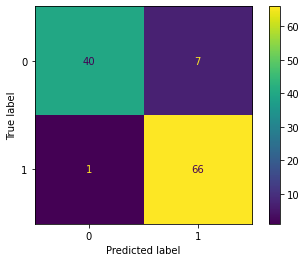

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
display.plot()
plt.show()

### ROC ( Area under the curve ) plot

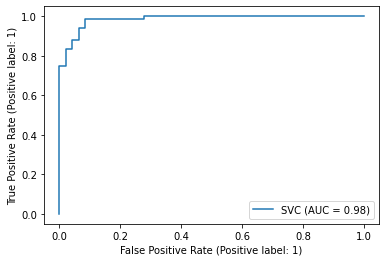

In [76]:
from sklearn.metrics import RocCurveDisplay
svm_roc = RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.show()

## Improving Results (Improving SVM model performance)

In this section, we will perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [16]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC


# Initialize the classifier
clf = SVC(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = { 'C':[100,1000,10000],
              'kernel':['rbf'],
              'gamma': [0.001, 0.0001,0.00001]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, refit=True,verbose=3)


# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
#best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.935 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.922 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.966 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.986 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1e-05, kernel=rbf;,

### Finding the best Hyperparameters

In [17]:
grid_fit.best_estimator_

SVC(C=1000, gamma=1e-05, random_state=0)

### ROC ( Area under the curve ) plot

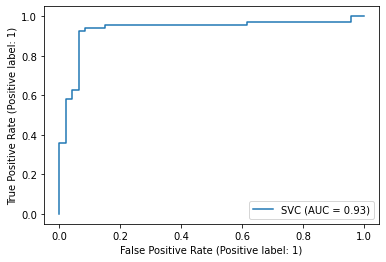

In [79]:
from sklearn.metrics import RocCurveDisplay
best_clf_roc = RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

### Final Support Vector Machine Model Evaluation ( Unoptimized vs Optimized )

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.9298           |  0.9123         |
| F-score        |  0.9192           |  0.9184         |

**Answer: ** 

The result shows that the optimized model performs much better than the unoptimized model.

# Model Implementation : Boosting ( Ada-Boost)

In [80]:
#importing the necessary libraries
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
adaboost = AdaBoostClassifier(random_state=0)

In [37]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    boosting = adaboost
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',boosting]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

Cross Validation Accuracies:
-------------------------
[0.9649122807017544, 0.9736842105263158, 0.9298245614035088, 0.9649122807017544, 0.9823008849557522]

Mean Cross Validation Accuracy:
-------------------------
0.9631268436578171

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.017857880216376975

Training Accuracy:
---------------
1.0




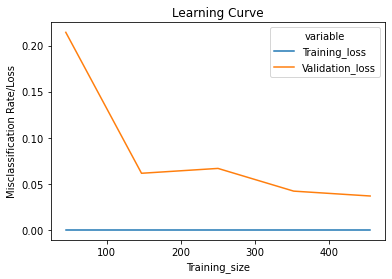

In [38]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

### Speed of Ada-boost on the training data set

In [82]:
%%time
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train,y_train)

CPU times: user 158 ms, sys: 3.71 ms, total: 162 ms
Wall time: 161 ms


AdaBoostClassifier(random_state=0)

### Speed of Ada-boost on the testing data set

In [83]:
%%time
predictions = adaboost.predict(X_test)

CPU times: user 13.9 ms, sys: 2.22 ms, total: 16.1 ms
Wall time: 14.1 ms


In [84]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Cross validation scores for training and testing data sets

In [85]:
#importing the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
ada_training_labels = adaboost.predict(X_train) 
ada_test_labels = adaboost.predict(X_test)
# printing cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score :",accuracy_score(y_train, ada_training_labels))
print("Training precision score :",precision_score(y_train, ada_training_labels))
print("Training recall score :",recall_score(y_train, ada_training_labels))
print("Training F1-score score :",f1_score(y_train, ada_training_labels))
print("Training Fbeta-score :",fbeta_score(y_train, ada_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score :",accuracy_score(y_test, ada_test_labels))
print("Testing precision score :",precision_score(y_test, ada_test_labels))
print("Testing recall score :",recall_score(y_test, ada_test_labels))
print("Testing F1-score score:",f1_score(y_test, ada_test_labels))
print("Testing Fbeta-score score:",fbeta_score(y_test, ada_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score : 1.0
Training precision score : 1.0
Training recall score : 1.0
Training F1-score score : 1.0
Training Fbeta-score : 1.0


Cross validation scores for testing(validataion) labels
Testing accuracy score : 0.956140350877193
Testing precision score : 0.9558823529411765
Testing recall score : 0.9701492537313433
Testing F1-score score: 0.962962962962963
Testing Fbeta-score score: 0.9587020648967551



##### confusion matrix plot 
True positive (TP) : 44
True negative (TN) : 65
False postive (FP - type 1 error ) : 3
False negative (FN - type 2 error ) : 2

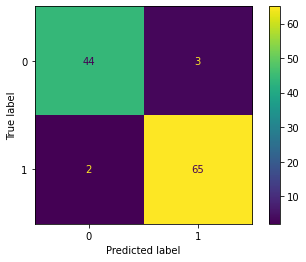

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=adaboost.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
display.plot()
plt.show()

### ROC ( Area under the curve ) plot

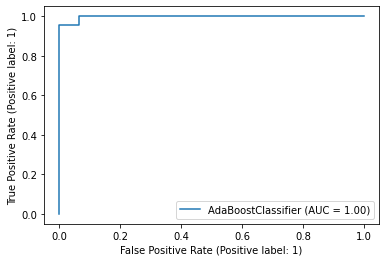

In [87]:
from sklearn.metrics import RocCurveDisplay
adaboost_roc = RocCurveDisplay.from_estimator(adaboost, X_test, y_test)
plt.show()

# Optimizing Ada_Boost 

## Improving Results (Improving Ada-Boost model performance)

In this section, we will perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [88]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[75,200,500],'learning_rate':[1.0,1.5,2.0]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and Optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9561
F-score on testing data: 0.9587

Optimized Model
------
Final accuracy score on the testing data: 0.9825
Final F-score on the testing data: 0.9851


### Finding the best Hyperparameters after the tunning

In [89]:
grid_fit.best_estimator_

AdaBoostClassifier(learning_rate=1.5, n_estimators=200, random_state=0)

### ROC ( Area under the curve ) plot

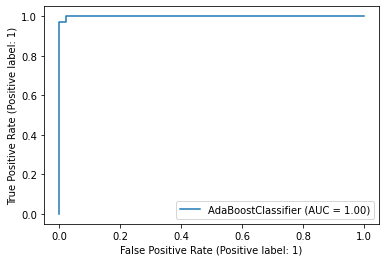

In [90]:
from sklearn.metrics import RocCurveDisplay
best_clf_roc = RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

### Final Decision Tree Model Evaluation ( Unoptimized vs Optimized )

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.9561           |  0.9825         |
| F-score        |  0.9587           |  0.9851         |

**Answer: ** 

The result shows the scores of the optimized model shows that it slightly performs better than the unoptimzed model.

# Model Implemenation : K-Nearest Neighbors 

In [46]:
#importing the necessary libraries
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### For K = 1

In [47]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

### Learning Curve ( K = 1 )

In [48]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    knn = knn_1
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',knn_1]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

Cross Validation Accuracies:
-------------------------
[0.956140350877193, 0.9736842105263158, 0.9298245614035088, 0.956140350877193, 0.9734513274336283]

Mean Cross Validation Accuracy:
-------------------------
0.9578481602235678

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.016033681003007488

Training Accuracy:
---------------
1.0




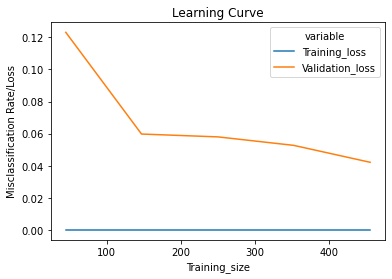

In [49]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

### Speed of KNN( k = 1 ) on the training data set

In [91]:
%%time
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,y_train)

CPU times: user 2.76 ms, sys: 551 µs, total: 3.31 ms
Wall time: 2.81 ms


KNeighborsClassifier(n_neighbors=1)

### Speed of KNN ( k = 1) on the testing data set

In [92]:
%%time
predictions = knn_1.predict(X_test)

CPU times: user 23 ms, sys: 1.27 ms, total: 24.3 ms
Wall time: 7.99 ms


In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.91      0.94      0.93        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



## Cross validation scores for training and testing data sets, KNN ( k = 1 )

In [94]:
#importing the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
knn1_training_labels = knn_1.predict(X_train) 
knn1_test_labels = knn_1.predict(X_test)

#printing the cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score :",accuracy_score(y_train, knn1_training_labels))
print("Training precision score :",precision_score(y_train, knn1_training_labels))
print("Training recall score :",recall_score(y_train, knn1_training_labels))
print("Training F1-score :",f1_score(y_train, knn1_training_labels))
print("Training Fbeta-score :",fbeta_score(y_train, knn1_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score :",accuracy_score(y_test, knn1_test_labels))
print("Testing precision score :",precision_score(y_test, knn1_test_labels))
print("Testing recall score :",recall_score(y_test, knn1_test_labels))
print("Testing F1-score :",f1_score(y_test, knn1_test_labels))
print("Testing Fbeta-score :",fbeta_score(y_test, knn1_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score : 1.0
Training precision score : 1.0
Training recall score : 1.0
Training F1-score : 1.0
Training Fbeta-score : 1.0


Cross validation scores for testing(validataion) labels
Testing accuracy score : 0.9122807017543859
Testing precision score : 0.9130434782608695
Testing recall score : 0.9402985074626866
Testing F1-score : 0.9264705882352942
Testing Fbeta-score : 0.9183673469387756



### Confusion matrix

##### confusion matrix plot 
True positive (TP) : 41
True negative (TN) : 63
False postive (FP - type 1 error ) : 6
False negative (FN - type 2 error ) : 4

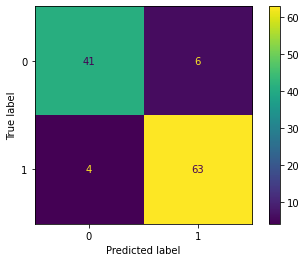

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=knn_1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_1.classes_)
display.plot()
plt.show()

### ROC ( Area under the curve ) plot

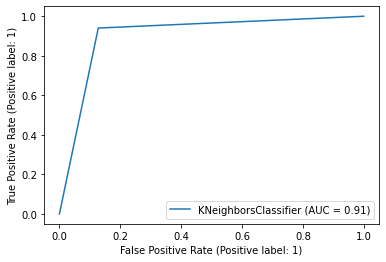

In [96]:
from sklearn.metrics import RocCurveDisplay
knn_1_roc = RocCurveDisplay.from_estimator(knn_1, X_test, y_test)
plt.show()

## Optimizing KNN ( Choosing a better K value)

Using the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [97]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### create the following plot using the information from your for loop

Text(0, 0.5, 'Error Rate')

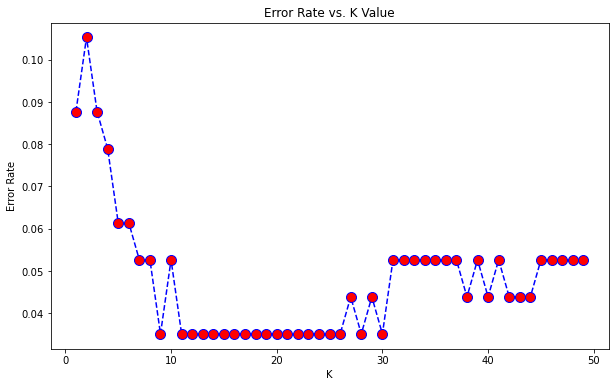

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Speed of KNN ( k = 10 ) on the training data set

In [99]:
%%time
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)

CPU times: user 2.59 ms, sys: 241 µs, total: 2.83 ms
Wall time: 2.68 ms


KNeighborsClassifier(n_neighbors=10)

### Speed of KNN ( k = 10 ) on the testing data set

In [100]:
%%time
knn_10.predict(X_test)

CPU times: user 25.1 ms, sys: 1.3 ms, total: 26.4 ms
Wall time: 8.17 ms


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [101]:
# NOW WITH K=10
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)
pred = knn_10.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [102]:
#importing the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
knn10_training_labels = knn_10.predict(X_train) 
knn10_test_labels = knn_10.predict(X_test)

#printing cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score :",accuracy_score(y_train, knn10_training_labels))
print("Training precision score :",precision_score(y_train, knn10_training_labels))
print("Training recall score :",recall_score(y_train, knn10_training_labels))
print("Training F1-score :",f1_score(y_train, knn10_training_labels))
print("Training Fbeta-score :",fbeta_score(y_train, knn10_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score :",accuracy_score(y_test, knn10_test_labels))
print("Testing precision score :",precision_score(y_test, knn10_test_labels))
print("Testing recall score :",recall_score(y_test, knn10_test_labels))
print("Testing F1-score :",f1_score(y_test, knn10_test_labels))
print("Testing Fbeta-score :",fbeta_score(y_test, knn10_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score : 0.9362637362637363
Training precision score : 0.9453924914675768
Training recall score : 0.9551724137931035
Training F1-score : 0.9502572898799313
Training Fbeta-score : 0.9473324213406291


Cross validation scores for testing(validataion) labels
Testing accuracy score : 0.9473684210526315
Testing precision score : 0.9552238805970149
Testing recall score : 0.9552238805970149
Testing F1-score : 0.9552238805970149
Testing Fbeta-score : 0.9552238805970148



In [103]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    knn = knn_10
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',knn_10]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

Cross Validation Accuracies:
-------------------------
[0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9911504424778761]

Mean Cross Validation Accuracy:
-------------------------
0.9666511411271541

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.012862476131669884

Training Accuracy:
---------------
0.9736379613356766




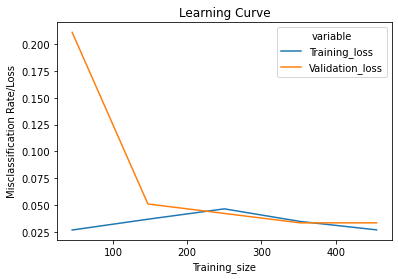

In [104]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


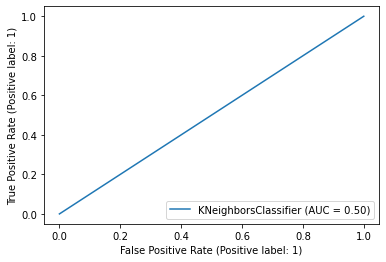

In [105]:
from sklearn.metrics import RocCurveDisplay
knn_10_roc = RocCurveDisplay.from_estimator(knn_10, X_test, y_test)
plt.show()

## Optimizing KNN 

## Improving Results (Improving KNN model performance)

In this section, we will perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

##### NOTE : KNN optimization idea taken from the following link : https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

In [109]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
clf = KNeighborsClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_neighbors':[9,20,25,30],
              'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan']}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)


# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and Optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9386
F-score on testing data: 0.9517

Optimized Model
------
Final accuracy score on the testing data: 0.9649
Final F-score on the testing data: 0.9621


In [110]:
grid_fit.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

### ROC ( Area under the curve ) plot 

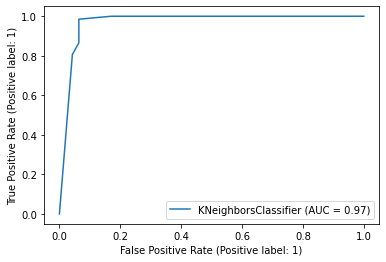

In [111]:
from sklearn.metrics import RocCurveDisplay
best_clf_roc = RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

### Finding the best Hyperparameters after the tunning

### Final Decision Tree Model Evaluation ( Unoptimized vs Optimized )

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.9386           |  0.9649         |
| F-score        |  0.9517           |  0.9621         |

**Answer: ** 

The result shows the scores of the optimized model shows that it slightly performs better than the unoptimzed model.

# Model Implemenation : Neural Nets 

In [112]:
#importing the necessary libraries and MLPclassifier
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The line below instantiates the model with the 'hidden_layer_sizes' argument set to three layers, which has the same number of neurons(i.e. 10 neurons each) as the count of features in the dataset. We will also select 'relu' as the activation function and 'adam' as the solver for weight optimization and with 300 epochs ( iterations ).

In [113]:
#The line below instantiates the model with the 'hidden_layer_sizes' argument set to three layers, 
#which has the same number of neurons(i.e. 50 neurons each) as the count of features in the dataset. 
#We will also select 'relu' as the activation function and 'adam' as the solver for weight optimization 
#and with 500 epochs ( iterations ).

nnets = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=500)

# Learning Curve on NN 

In [114]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    
    ''' param X: Matrix of input features
        param y: Vector of Target/Label
        c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
       KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
       Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
    '''
    #le = LabelEncoder() # Label encoding the target
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    #log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    nn = nnets
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',nn]))
    
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
    
    
    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set
    
    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}

Cross Validation Accuracies:
-------------------------
[0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9912280701754386, 0.9734513274336283]

Mean Cross Validation Accuracy:
-------------------------
0.9753920198726906

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.008604707257683817

Training Accuracy:
---------------
1.0




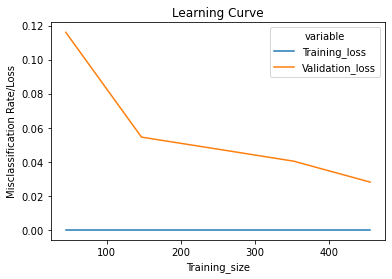

In [115]:
lc = learn_curve(features,target,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

## Speeed of NN on the training data set 

In [116]:
%%time
nnets = nnets = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=500)
nnets.fit(X_train,y_train)

CPU times: user 559 ms, sys: 8.91 ms, total: 568 ms
Wall time: 147 ms


MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)

## Speed of NN on the testing data set

In [117]:
%%time
predictions = nnets.predict(X_test)

CPU times: user 5.47 ms, sys: 992 µs, total: 6.46 ms
Wall time: 2.97 ms


In [118]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## Cross validation scores for training and testing data sets, NN 

In [119]:
#import the necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
nnets_training_labels = nnets.predict(X_train) 
nnets_test_labels = nnets.predict(X_test)
#printing cross validation scores
print("Cross validation scores for training labels")
print("Training accuracy score :",accuracy_score(y_train, nnets_training_labels))
print("Training precision score :",precision_score(y_train, nnets_training_labels))
print("Training recall score :",recall_score(y_train, nnets_training_labels))
print("Training F1-score :",f1_score(y_train, nnets_training_labels))
print("Training Fbeta-score :",fbeta_score(y_train, nnets_training_labels, beta=0.5))
print("\n")
print("Cross validation scores for testing(validataion) labels")
print("Testing accuracy score :",accuracy_score(y_test, nnets_test_labels))
print("Testing precision score :",precision_score(y_test, nnets_test_labels))
print("Testing recall score :",recall_score(y_test, nnets_test_labels))
print("Testing F1-score :",f1_score(y_test, nnets_test_labels))
print("Testing Fbeta-score :",fbeta_score(y_test, nnets_test_labels, beta=0.5))
print("")

Cross validation scores for training labels
Training accuracy score : 0.9208791208791208
Training precision score : 0.9319727891156463
Training recall score : 0.9448275862068966
Training F1-score : 0.9383561643835617
Training Fbeta-score : 0.9345156889495225


Cross validation scores for testing(validataion) labels
Testing accuracy score : 0.9298245614035088
Testing precision score : 0.927536231884058
Testing recall score : 0.9552238805970149
Testing F1-score : 0.9411764705882353
Testing Fbeta-score : 0.9329446064139941



#### confusion matrix 

##### confusion matrix plot 
True positive (TP) : 42
True negative (TN) : 64
False postive (FP - type 1 error ) : 5
False negative (FN - type 2 error ) : 3

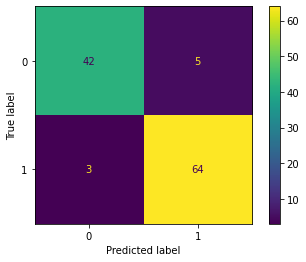

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=nnets.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nnets.classes_)
display.plot()
plt.show()

### ROC ( Area under the curve ) plot 

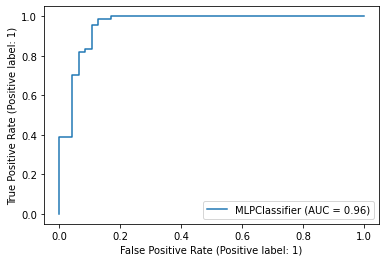

In [121]:
from sklearn.metrics import RocCurveDisplay
nnets_disp = RocCurveDisplay.from_estimator(nnets, X_test, y_test)
plt.show()

## Optimizing Neural Nets

## Improving Results (Improving Neural Nets model performance)

In this section, we will perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [148]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVC


# Initialize the classifier
nnets = MLPClassifier(max_iter=500)


# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {
    'hidden_layer_sizes': [(50,55,60)],
    'activation': ['relu','tanh'],
    'max_iter': [1000],
    'solver': ['adam','sgd']}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(nnets, parameters, scoring = scorer)


# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
#best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9386
F-score on testing data: 0.9517

Optimized Model
------
Final accuracy score on the testing data: 0.9561
Final F-score on the testing data: 0.9587


In [149]:
grid_fit.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 55, 60), max_iter=1000)

### ROC ( Area under the curve) plot

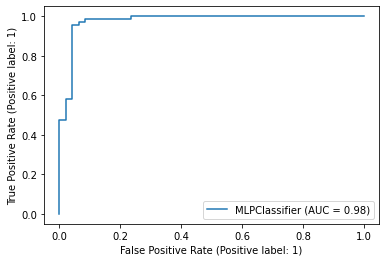

In [150]:
from sklearn.metrics import RocCurveDisplay
best_clf_roc = RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

### Finding the best Hyperparameters after the tunning

### Final Neural Nets Model Evaluation ( Unoptimized vs Optimized )

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.9386           |  0.9561         |
| F-score        |  0.9517           |  0.9587         |

**Answer: ** 

The result shows the scores of the optimized model shows that it slightly performs better than the unoptimzed model.